# Build a K-Nearest Neighbors Classification Model

In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors, preprocessing, decomposition
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
X_train_df = pd.read_csv("output/train_data_normalized.csv")
X_test_df = pd.read_csv("output/test_data_normalized.csv")
y_train_df = pd.read_csv("output/train_labels.csv")
y_test_df = pd.read_csv("output/test_labels.csv")
features = X_train_df.columns

X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()
y_train = y_train_df.to_numpy().ravel()
y_test = y_test_df.to_numpy().ravel()

### Begin with a base model that uses the default parameters

In [3]:
#Define KNN classifier and fit it to training data
knn_base = neighbors.KNeighborsClassifier()
knn_base.fit(X_train, y_train)

KNeighborsClassifier()

In [4]:
#Check classification report for prediction of training data
base_train_preds = knn_base.predict(X_train)
print(classification_report(y_train, base_train_preds))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     19706
           1       0.75      0.72      0.74     11481

    accuracy                           0.81     31187
   macro avg       0.80      0.79      0.79     31187
weighted avg       0.81      0.81      0.81     31187



In [5]:
#Check classification report for prediction of test data
base_test_preds = knn_base.predict(X_test)
print(classification_report(y_test, base_test_preds))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4960
           1       0.62      0.59      0.61      2837

    accuracy                           0.72      7797
   macro avg       0.70      0.69      0.70      7797
weighted avg       0.72      0.72      0.72      7797



### Use GridSearchCV to identify the best model parameters

In [6]:
parameters = {
    'n_neighbors': np.arange(1,101,3),
    'weights': ["distance","uniform"]
}
knn_gs = GridSearchCV(knn_base, parameters, verbose=1, cv=5)
knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 68 candidates, totalling 340 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
        40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
        79,  82,  85,  88,  91,  94,  97, 100]),
                         'weights': ['distance', 'uniform']},
             verbose=1)

In [7]:
knn_gs.best_params_

{'n_neighbors': 82, 'weights': 'distance'}

In [8]:
#Let's run our own cross validation to see if we identify the same best parameters as GridSearch
#First let's check using distance weights
k_vals = np.arange(1,101,3)
dist_results_train = np.zeros([len(k_vals),2])
folds = KFold(n_splits = 5)
#See how the classifier's accuracy changes over the range of k values when using distance weights
for k in range(len(k_vals)):
    dist_clf = neighbors.KNeighborsClassifier(n_neighbors=k_vals[k], weights='distance')
    train_accuracy = []
    for train,test in folds.split(X_train):
        dist_clf.fit(X_train[train], y_train[train])
        train_correct = 0
        dist_preds = dist_clf.predict(X_train[test])
        for i in range(len(dist_preds)):
            if y_train[test][i] == dist_preds[i]:
                train_correct += 1
        train_accuracy.append(train_correct/(len(dist_preds)))
    dist_results_train[k] = [k_vals[k],np.mean(train_accuracy)]
dist_results_train

array([[  1.        ,   0.7264567 ],
       [  4.        ,   0.74139874],
       [  7.        ,   0.75573174],
       [ 10.        ,   0.76086209],
       [ 13.        ,   0.76204837],
       [ 16.        ,   0.76339511],
       [ 19.        ,   0.76602458],
       [ 22.        ,   0.76746741],
       [ 25.        ,   0.76826902],
       [ 28.        ,   0.77044946],
       [ 31.        ,   0.77093043],
       [ 34.        ,   0.77086628],
       [ 37.        ,   0.77144345],
       [ 40.        ,   0.77227723],
       [ 43.        ,   0.77311095],
       [ 46.        ,   0.77391256],
       [ 49.        ,   0.77327126],
       [ 52.        ,   0.77452174],
       [ 55.        ,   0.77346368],
       [ 58.        ,   0.7740729 ],
       [ 61.        ,   0.77352781],
       [ 64.        ,   0.77420116],
       [ 67.        ,   0.7734637 ],
       [ 70.        ,   0.77410498],
       [ 73.        ,   0.77500277],
       [ 76.        ,   0.7743615 ],
       [ 79.        ,   0.7743935 ],
 

In [9]:
#Run cross validation again - this time using uniform weights
k_vals = np.arange(1,101,3)
uni_results_train = np.zeros([len(k_vals),2])
folds = KFold(n_splits = 5)
#See how the classifier's accuracy changes over the range of k values when using uniform weights
for k in range(len(k_vals)):
    uni_clf = neighbors.KNeighborsClassifier(n_neighbors=k_vals[k], weights='uniform')
    train_accuracy = []
    for train,test in folds.split(X_train):
        uni_clf.fit(X_train[train], y_train[train])
        train_correct = 0
        uni_preds = uni_clf.predict(X_train[test])
        for i in range(len(uni_preds)):
            if y_train[test][i] == uni_preds[i]:
                train_correct += 1
        train_accuracy.append(train_correct/(len(uni_preds)))
    uni_results_train[k] = [k_vals[k],np.mean(train_accuracy)]
uni_results_train

array([[  1.        ,   0.7264567 ],
       [  4.        ,   0.70147817],
       [  7.        ,   0.71462488],
       [ 10.        ,   0.71449646],
       [ 13.        ,   0.71702958],
       [ 16.        ,   0.71433623],
       [ 19.        ,   0.71921021],
       [ 22.        ,   0.71898561],
       [ 25.        ,   0.72074926],
       [ 28.        ,   0.72039646],
       [ 31.        ,   0.72302585],
       [ 34.        ,   0.7221921 ],
       [ 37.        ,   0.72357096],
       [ 40.        ,   0.72302598],
       [ 43.        ,   0.72674551],
       [ 46.        ,   0.7235711 ],
       [ 49.        ,   0.72661723],
       [ 52.        ,   0.72469327],
       [ 55.        ,   0.7253026 ],
       [ 58.        ,   0.72418028],
       [ 61.        ,   0.72392384],
       [ 64.        ,   0.72379553],
       [ 67.        ,   0.72478949],
       [ 70.        ,   0.7232184 ],
       [ 73.        ,   0.72482153],
       [ 76.        ,   0.7231221 ],
       [ 79.        ,   0.72456502],
 

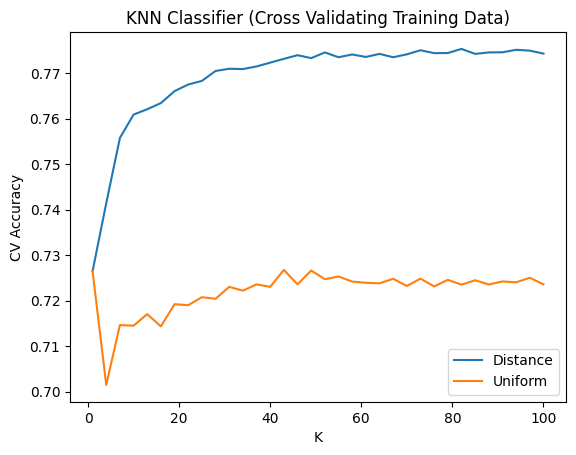

In [10]:
#Visualize the results of cross validation
plt.figure()
plt.title("KNN Classifier (Cross Validating Training Data)")
plt.xlabel("K")
plt.ylabel("CV Accuracy")
plt.plot(dist_results_train[:,0],dist_results_train[:,1],label="Distance")
plt.plot(uni_results_train[:,0],uni_results_train[:,1],label="Uniform")
plt.legend()

Our own cross validation yielded the same results as GridSearch. The highest accuracy we measured was the KNN model that used k = 82 and distance weights.

While we do see better accuracy as we increase k up to 82, the gains are relatively small once we pass k = 30. The accuracy of the models we tested that used distance weights clearly levels off around that point.

If we wanted to use a smaller value for k in our KNN model, we would not be sacrificing much accuracy.

### Experiment with Feature Reduction using PCA

In [11]:
smoker_pca = decomposition.PCA(svd_solver='randomized')
X_train_trans = smoker_pca.fit_transform(X_train)

np.set_printoptions(precision=3, suppress=True)
print(X_train_trans)

[[-0.249  0.286 -0.188 ...  0.002 -0.001 -0.001]
 [-0.216  0.002  0.034 ...  0.014 -0.002 -0.004]
 [-0.194 -0.188  0.035 ...  0.003 -0.001 -0.003]
 ...
 [-0.21  -0.054 -0.092 ... -0.012  0.     0.001]
 [-0.252  0.333 -0.188 ...  0.004  0.001  0.001]
 [-0.267  0.459 -0.234 ...  0.017 -0.001  0.001]]


In [12]:
smoker_pca.explained_variance_ratio_

array([0.46 , 0.162, 0.106, 0.073, 0.033, 0.031, 0.027, 0.024, 0.018,
       0.015, 0.012, 0.009, 0.007, 0.006, 0.005, 0.005, 0.004, 0.003,
       0.001, 0.001, 0.   , 0.   ])

*Note:*  The first 8 components explain > 90% of the variance in our dataset (~91.6%)

In [13]:
#Rerun PCA and explicitly choose 8 components
smoker_pca8 = decomposition.PCA(n_components=8, svd_solver='randomized')
X_train_trans8 = smoker_pca8.fit_transform(X_train)
print(X_train_trans8)

[[-0.249  0.286 -0.188 ...  0.03  -0.158  0.051]
 [-0.216  0.002  0.034 ... -0.02  -0.083  0.065]
 [-0.194 -0.188  0.035 ... -0.022 -0.08  -0.12 ]
 ...
 [-0.21  -0.054 -0.092 ...  0.005 -0.003  0.102]
 [-0.252  0.333 -0.188 ... -0.008  0.008  0.056]
 [-0.267  0.459 -0.234 ...  0.032 -0.084 -0.152]]


In [14]:
X_train_trans8.shape

(31187, 8)

In [15]:
#Rerun KNN using the transformed data and the same parameters from our best model
knn_pca = neighbors.KNeighborsClassifier(n_neighbors=82, weights='distance')
knn_pca.fit(X_train_trans8, y_train)

#Run the model against the transformed training data
pca_train_preds = knn_pca.predict(X_train_trans8)
print(classification_report(y_train, pca_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19706
           1       1.00      1.00      1.00     11481

    accuracy                           1.00     31187
   macro avg       1.00      1.00      1.00     31187
weighted avg       1.00      1.00      1.00     31187



In [16]:
#Transform the test data using the same PCs
X_test_trans8 = smoker_pca8.fit_transform(X_test)

#Run the model against the transformed test data
pca_test_preds = knn_pca.predict(X_test_trans8)
print(classification_report(y_test, pca_test_preds))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      4960
           1       0.59      0.57      0.58      2837

    accuracy                           0.70      7797
   macro avg       0.68      0.67      0.67      7797
weighted avg       0.70      0.70      0.70      7797



*Note:* The KNN model was less accurate when it was fit to the transformed dataset after performing PCA

### Best KNN Model

In [17]:
#Define new KNN model using the best parameters that were identified by GridSearch and confirmed by our cross validation
knn_best = neighbors.KNeighborsClassifier(n_neighbors=82, weights='distance')
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=82, weights='distance')

In [18]:
best_train_preds = knn_best.predict(X_train)
print(classification_report(y_train, best_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19706
           1       1.00      1.00      1.00     11481

    accuracy                           1.00     31187
   macro avg       1.00      1.00      1.00     31187
weighted avg       1.00      1.00      1.00     31187



In [19]:
best_test_preds = knn_best.predict(X_test)
print(classification_report(y_test, best_test_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4960
           1       0.72      0.67      0.70      2837

    accuracy                           0.79      7797
   macro avg       0.77      0.76      0.77      7797
weighted avg       0.79      0.79      0.79      7797



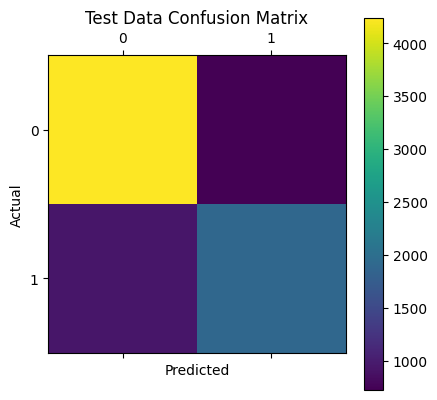

In [20]:
#Create and visualize Confusion Matrix for the best model's predictions of the test data
test_cm = confusion_matrix(y_test, best_test_preds)
plt.matshow(test_cm)
plt.title('Test Data Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()